In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clr
import pandas as pd

from k_means import Kmeans
from spectral_k_means import spectralKmeans

plt.rcParams['figure.constrained_layout.use'] = True

In [12]:
data_file = "../data/cm_dataset_2 - cm_dataset.csv"

### Sub-question i.

[97289.34925791 52604.85738186 51567.39743886 51074.2187308
 50954.55222498 50939.09486804 50933.08134459 50931.50116918
 50923.30152142 50916.05605945 50904.13657585 50880.99777105
 50856.62521535 50853.87411784 50853.19744553 50847.6332647
 50847.07826754 50841.8004368  50835.53446439 50830.7417353
 50815.71776042 50784.75688106 50770.56073995 50753.47059672
 50737.719257   50730.14722491]


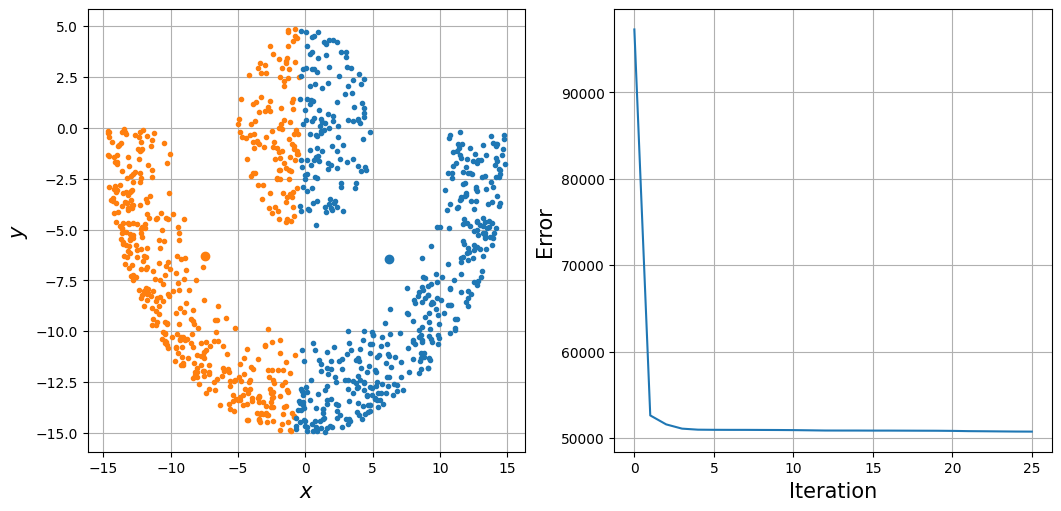

[97319.99567403 72143.3770844  59992.18544799 53951.64335738
 52154.83300657 51258.61123291 50983.95035838 50939.09486804
 50933.08134459 50931.50116918 50923.30152142 50916.05605945
 50904.13657585 50880.99777105 50856.62521535 50853.87411784
 50853.19744553 50847.6332647  50847.07826754 50841.8004368
 50835.53446439 50830.7417353  50815.71776042 50784.75688106
 50770.56073995 50753.47059672 50737.719257   50730.14722491]


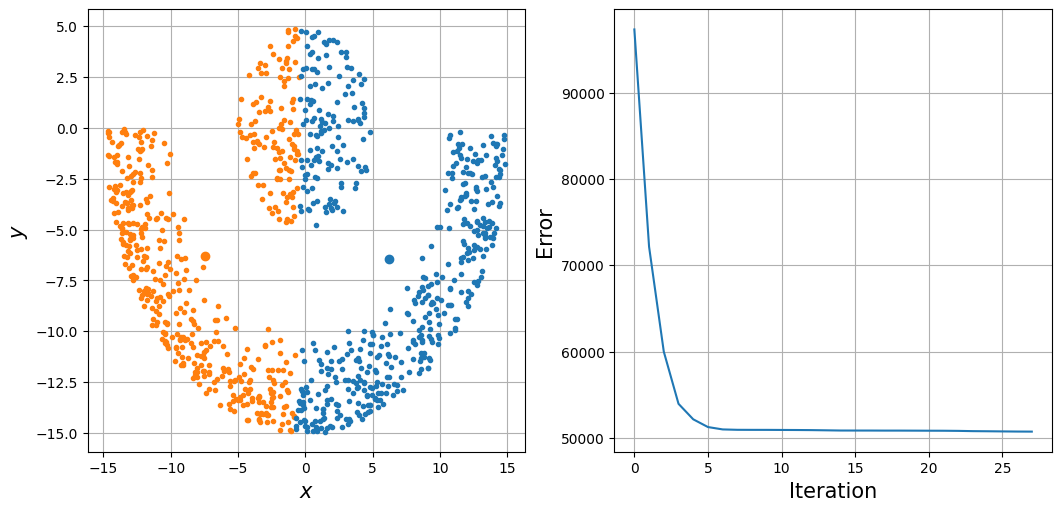

[97220.33524593 50737.28983286 50708.88607788 50696.93797491
 50691.0695854  50665.86288632 50623.56998105 50594.50255207
 50581.81597434 50559.89185429 50547.09773421 50543.21531803
 50542.21877502 50541.31409167 50539.35098232 50537.7336742
 50536.33848626 50535.39608343 50534.96380328]


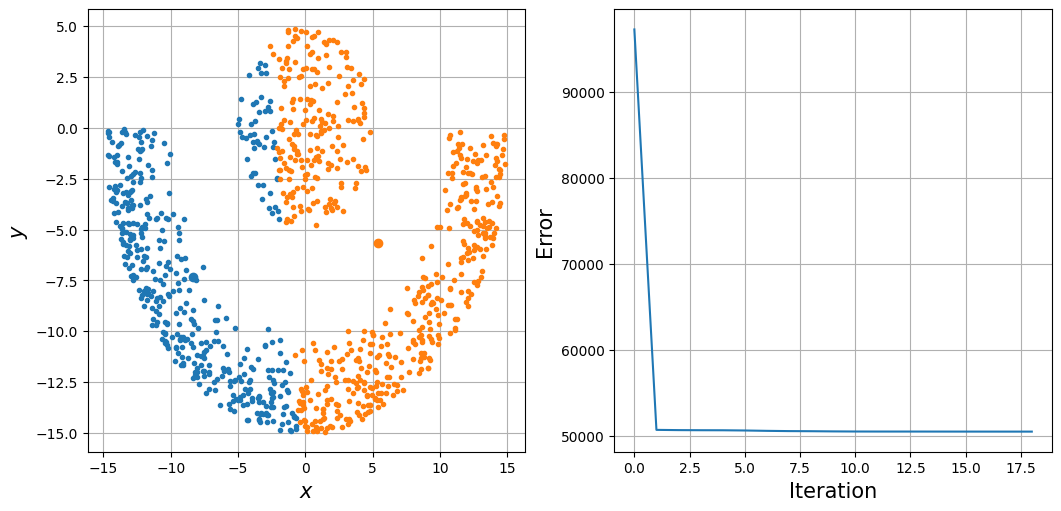

[97310.295835   52333.23882181 51418.19296186 51057.02474814
 50945.06070047 50934.37958174 50932.27520833 50924.56037746
 50916.05605945 50904.13657585 50880.99777105 50856.62521535
 50853.87411784 50853.19744553 50847.6332647  50847.07826754
 50841.8004368  50835.53446439 50830.7417353  50815.71776042
 50784.75688106 50770.56073995 50753.47059672 50737.719257
 50730.14722491]


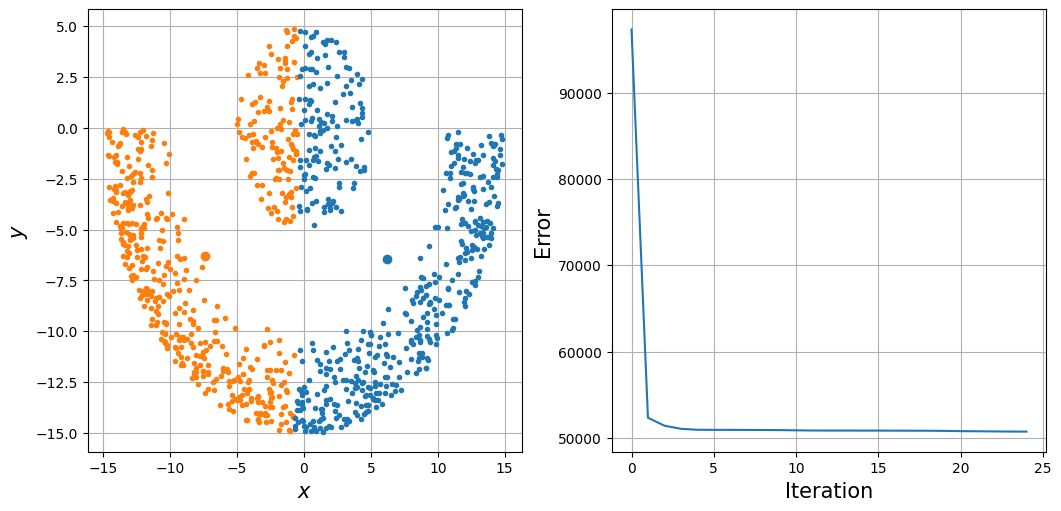

[97137.13999753 51545.38153862 50852.92877677 50678.91625689
 50611.14500725 50590.1650492  50558.53996064 50544.63498376
 50538.22519704 50534.96380328]


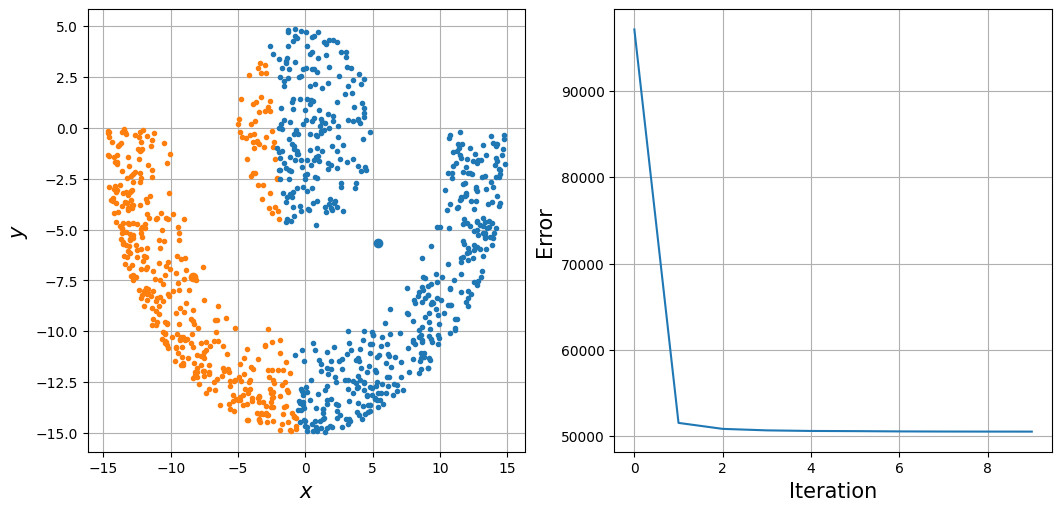

[97222.71900068 50720.06709465 50634.34924207 50604.29344246
 50589.81104926 50575.9603188  50552.90474264 50547.34561721
 50544.09240979 50539.35098232 50537.7336742  50536.33848626
 50535.39608343 50534.96380328]


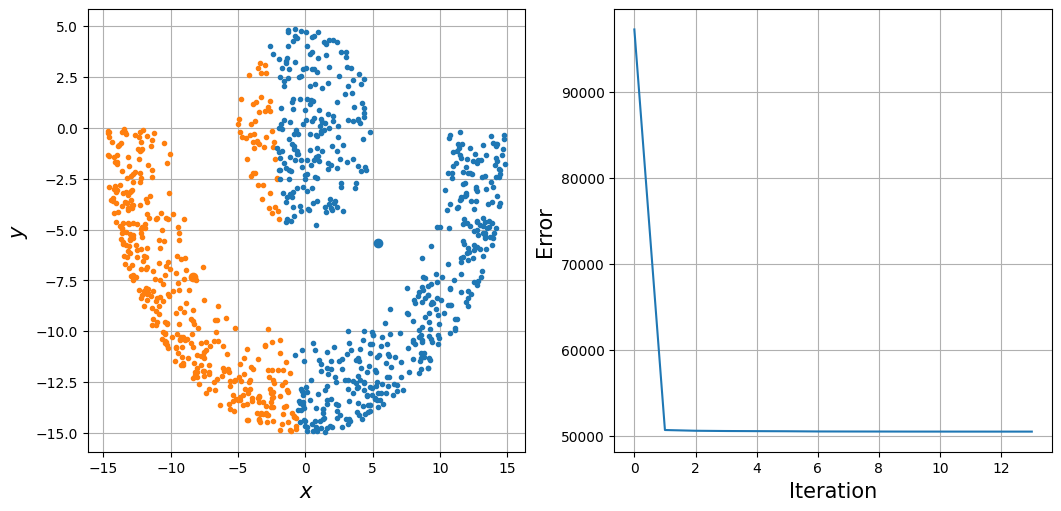

In [13]:
random_seed = [0, 1, 2, 3, 4, 5]

for seed in random_seed:
    km = Kmeans(data_file=data_file,
                num_clusters=2,
                seed=seed,
                initialize_method="random")
    km.run()
    plt.figure(figsize = (10.5,5))
    km.plot_data()
    print(km.errors)
    plt.savefig(f"../outputs/question2/q2_i_seed{seed}")
    plt.show()

### Sub-question ii.

[[ 6.23287582 -6.46186917]
 [-7.41888751 -6.2851665 ]]


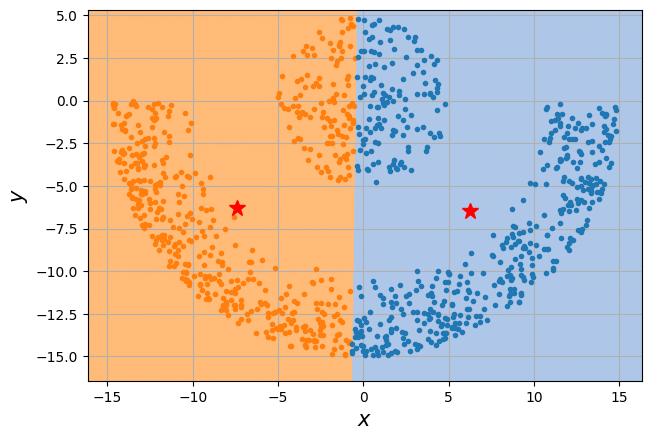

[[  9.47108889  -4.75087419]
 [ -6.97327976  -3.16057436]
 [ -0.51050169 -12.71336759]]


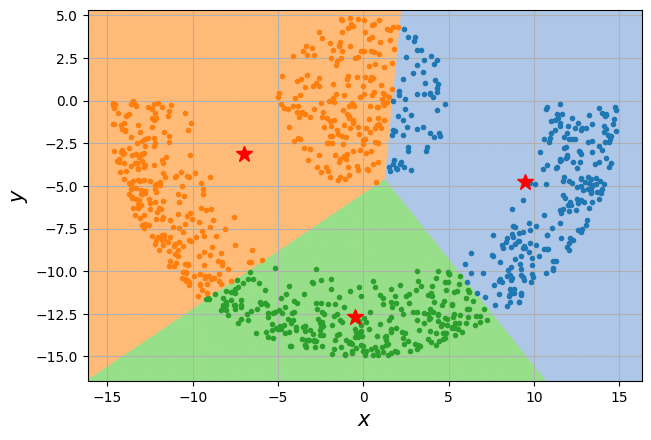

[[ 11.35345514  -5.8175964 ]
 [-11.13403102  -6.37970265]
 [  0.52633745 -12.81712176]
 [ -0.1116423   -0.09395197]]


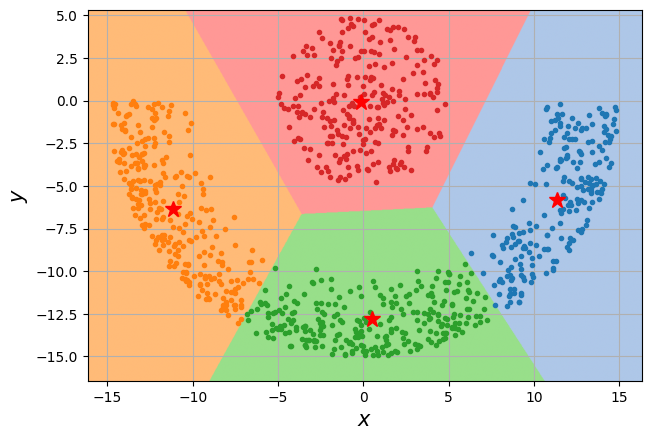

[[-12.22117113  -4.6353991 ]
 [ 11.81277796  -5.08024801]
 [ -5.84871469 -11.83515593]
 [ -0.1116423   -0.09395197]
 [  3.76045757 -12.49779223]]


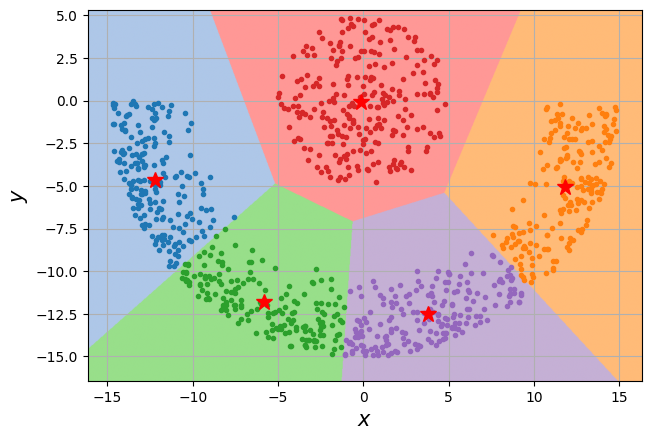

In [21]:
seed = 0
clusters = [2,3,4,5]
for c in clusters:
    km = Kmeans(data_file=data_file,
                num_clusters=c,
                seed=seed,
                initialize_method="random")
    km.run()
    print(km.m_cur)
    km.generate_voronoi()
    for m in km.m_cur:
        plt.plot(m[0], m[1], 'r*', markersize=12)
    plt.savefig(f"../outputs/question2/q2_ii_cluster{c}")
    plt.show()

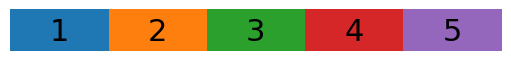

In [5]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.figure(figsize=(5, 0.5))
cmap_5 = clr.ListedColormap(plt.cm.tab10.colors[:5])
img = plt.imshow(gradient, aspect='auto', cmap=cmap_5)
for i in range(5):
    plt.text(20+i*51.2, 1, f"{i+1}", fontsize = 22)
plt.axis('off')
plt.savefig(f"../outputs/question2/q1_ii_colormap", bbox_inches='tight')

### Sub-question iii.

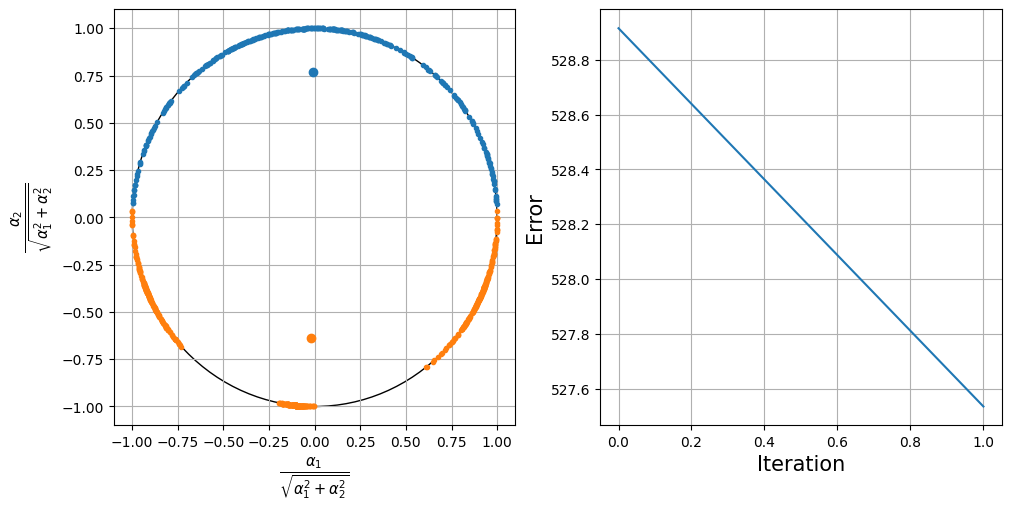

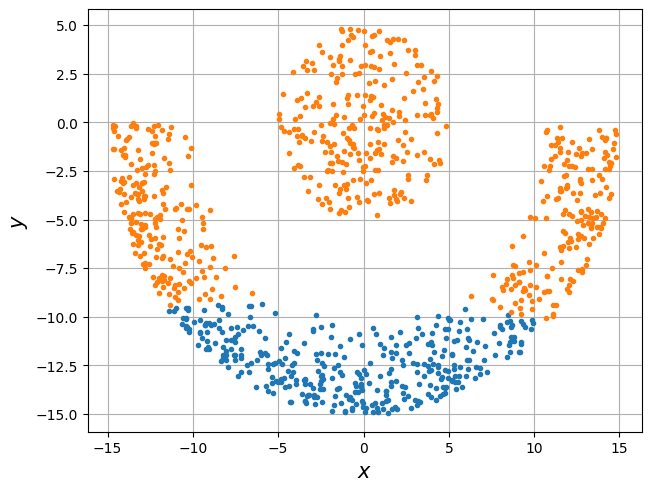

In [6]:
sk = spectralKmeans(data_file=data_file,
                    num_clusters=2,
                    kernel='polynomial',
                    seed=10,
                    params={"d": 3,
                            "sigma": 1.3},
                    initialize_method="Kmeans++")

sk.run()

plt.figure(figsize=(10,5))
sk.plot_kmeans_data()
plt.savefig(f"../outputs/question2/q2_iii_poly_error")
plt.show()

sk.plot_data()
plt.savefig(f"../outputs/question2/q2_iii_poly_clusters")
plt.show()


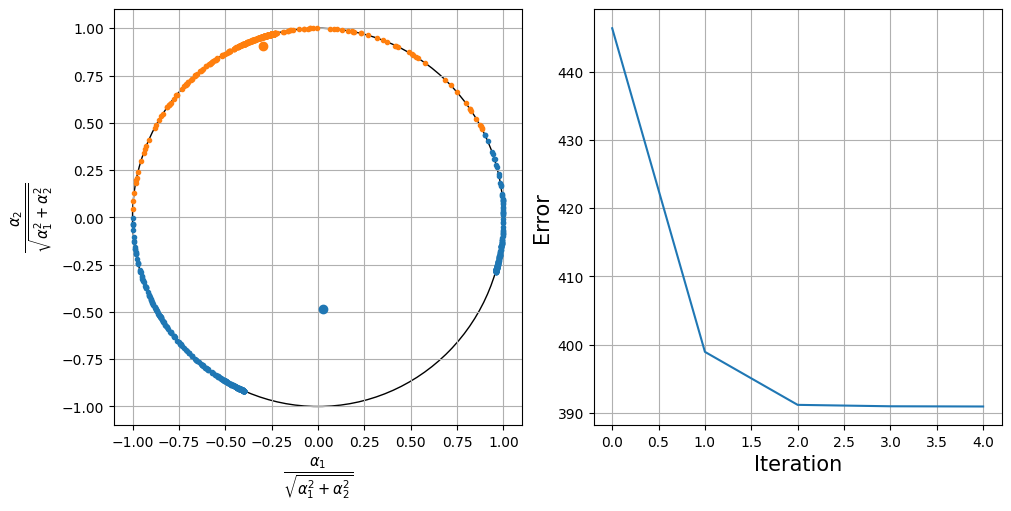

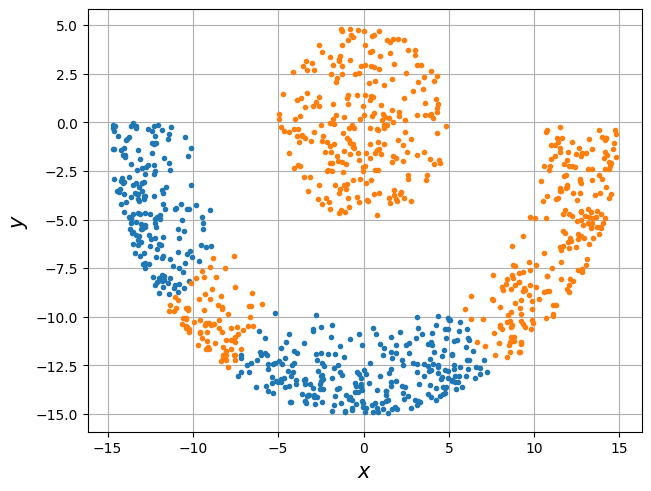

In [7]:
sk = spectralKmeans(data_file=data_file,
                    num_clusters=2,
                    kernel='radial basis',
                    seed=10,
                    params={"d": 3,
                            "sigma": 1.3},
                    initialize_method="Kmeans++")

sk.run()

plt.figure(figsize=(10,5))
sk.plot_kmeans_data()
plt.savefig(f"../outputs/question2/q2_iii_radial_error")
plt.show()

sk.plot_data()
plt.savefig(f"../outputs/question2/q2_iii_radial_clusters")
plt.show()



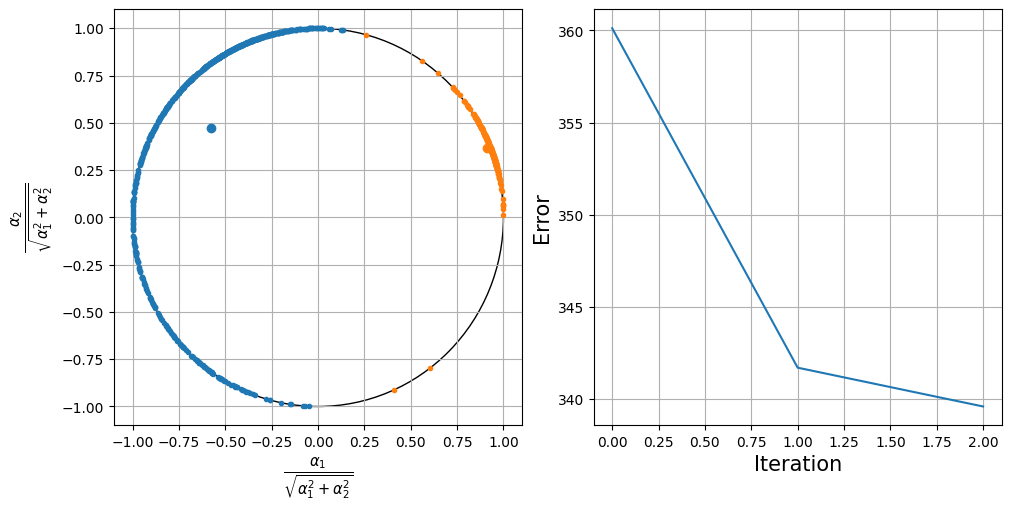

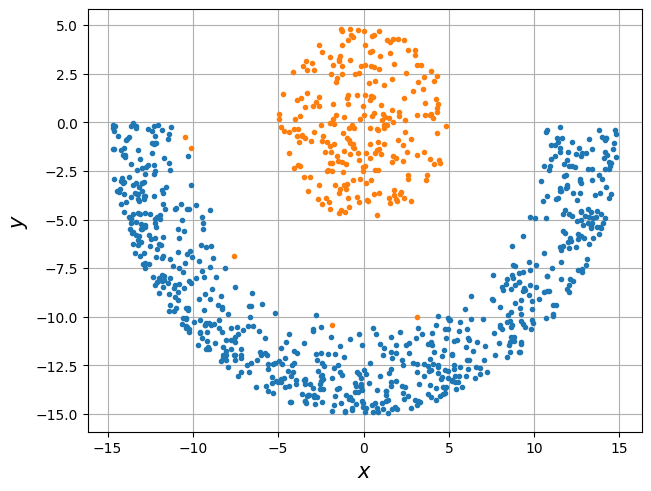

In [8]:
sk = spectralKmeans(data_file=data_file,
                    num_clusters=2,
                    kernel='custom',
                    seed=10,
                    params={"d": 3,
                            "z": 10,
                            "sigma": 3},
                    initialize_method="Kmeans++",
                    cluster_method="Kmeans")

sk.run()

plt.figure(figsize=(10,5))
sk.plot_kmeans_data()
plt.savefig(f"../outputs/question2/q2_iii_custom_error")
plt.show()

sk.plot_data()
plt.savefig(f"../outputs/question2/q2_iii_custom_clusters")
plt.show()


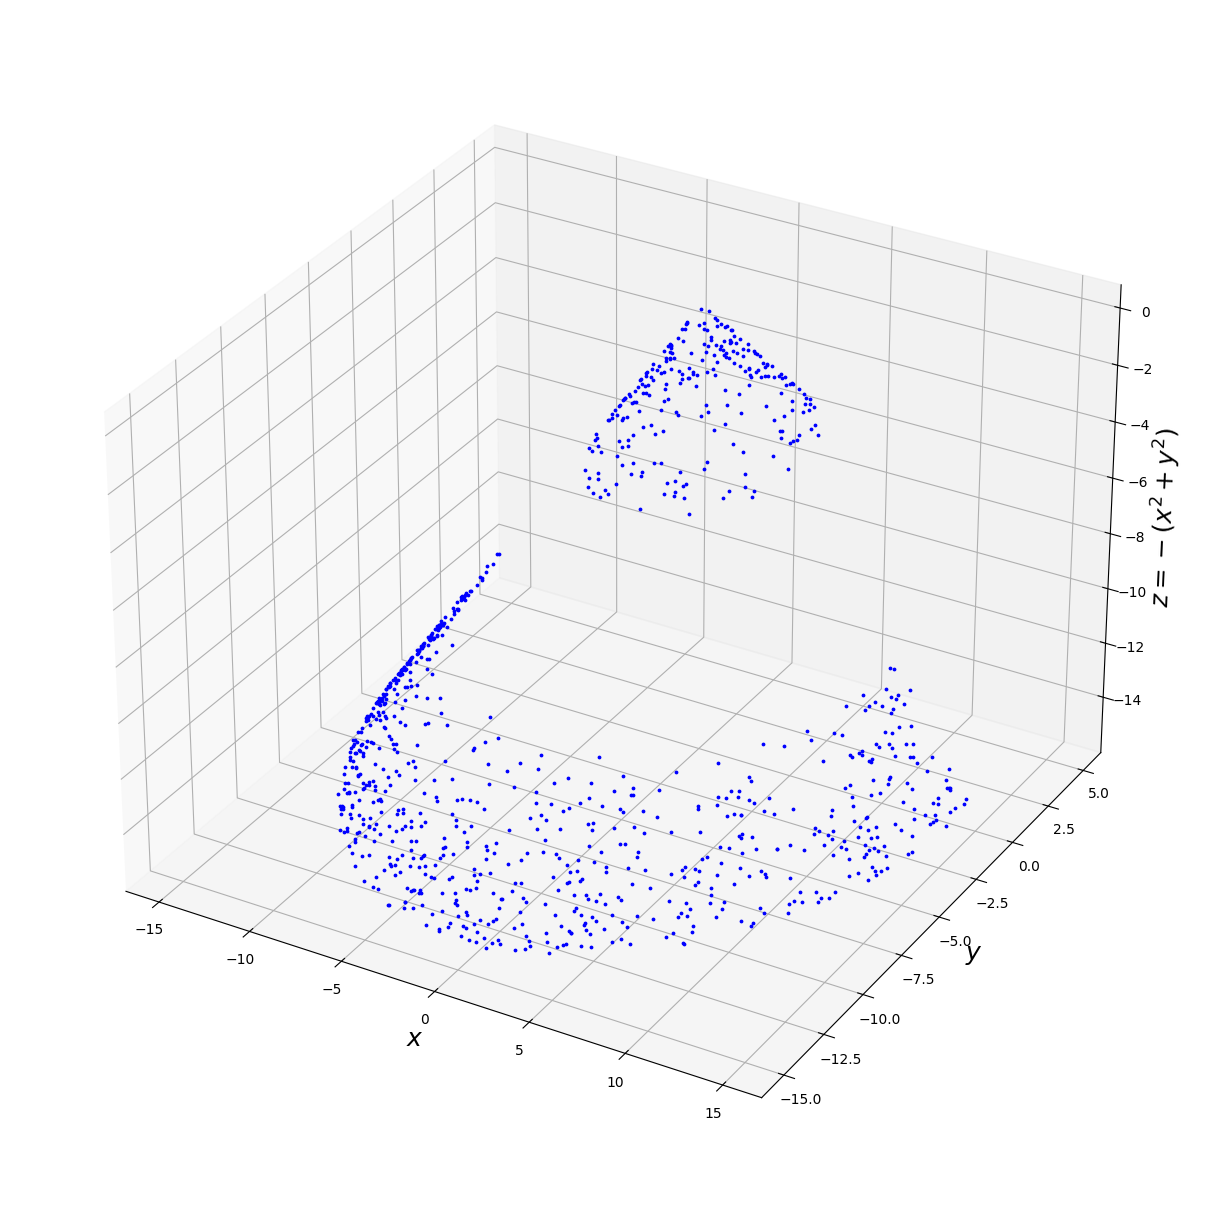

In [9]:
data = np.loadtxt(data_file, delimiter=',').astype(float)
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_zlabel(r"$z = -(x^2 + y^2)$", fontsize=18)

ax.set_box_aspect(aspect=None, zoom=0.95)
for i in range(data.shape[0]):
    ax.scatter3D(data[i,0], data[i,1], -np.sqrt(data[i,0]**2 + data[i,1]**2), color='blue', s=3)

plt.savefig(f"../outputs/question2/q2_iii_custom_transform")
plt.show()

### Sub-question iv.

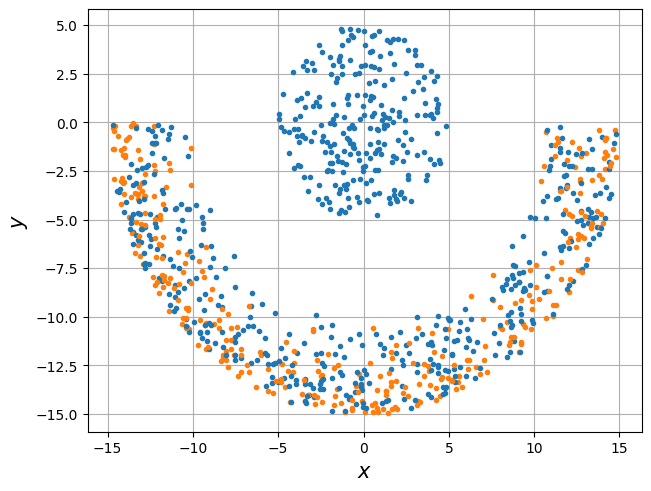

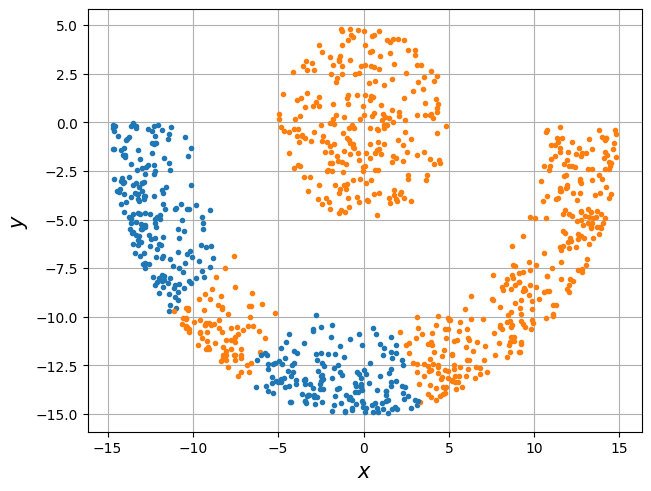

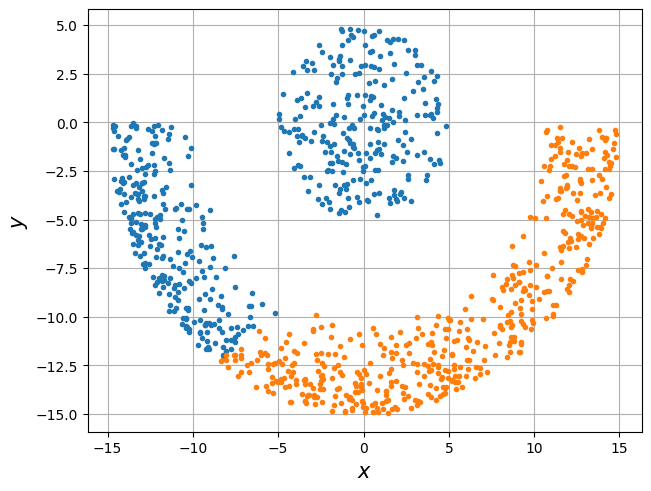

In [23]:
kers = ['custom', 'radial basis', 'polynomial']
for ker in kers:
    sk = spectralKmeans(data_file=data_file,
                        num_clusters=2,
                        kernel=ker,
                        seed=10,
                        params={"d": 3,
                                "z": 9,
                                "sigma": 1.3},
                        initialize_method="Kmeans++",
                        cluster_method="max")
    sk.run()
    sk.plot_data()
    plt.savefig(f"../outputs/question2/q2_iv_{ker[0]}_max")
    plt.show()
